<a href="https://colab.research.google.com/github/vvrgit/EV_Scheduling/blob/main/Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application for EVCM.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Electricity Price Forecasting.**

In [ ]:
# Import various libraries.
from keras.models import load_model
import numpy as np
import pandas as pd

In [ ]:
# Load model
model = load_model('/content/drive/MyDrive/EV Scheduling/my_model_relu_78_6.h5')

### **Price forecasting for Single value Prediction.**

In [ ]:
# Inputs for Price Forecasting.
input_list = [
    10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 9999.26,
    7029.73, 4728.21, 4519.64, 4519.13, 4268.88, 4179.58, 4179.33, 4179.07,
    4099.03, 4191.08, 4191.38, 4000.39, 4000.11, 3679.10, 3890.50, 3919.40,
    4000.11, 4410.94, 5000.20, 4788.11, 4179.25, 3919.96, 3960.65, 3899.56,
    3570.92, 3470.39, 3300.97, 3000.20, 2999.97, 2999.50, 3000.56, 3112.07,
    3210.36, 3112.18, 3249.19, 3100.06, 3079.45, 3000.41, 3000.61, 3075.41,
    3330.75, 3390.95, 3390.57, 3390.24, 3385.85, 3385.29, 3385.45, 3390.57,
    3500.14, 3537.67, 3640.50, 3731.68, 3910.29, 3919.92, 3985.50, 4002.90,
    4299.91, 4379.10, 4729.73, 5000.46, 5505.47, 5000.86, 5000.97, 5232.55,
    5999.62, 4975.50, 5423.79, 10000.00, 10000.00, 10000.00, 10000.00,
    10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 10000.00,
    10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 10000.00, 10000.00,
    10000.00, 10000.00, 10000.00, 10000.00, 1, 0, 0.6267, 1, 1
    ]

In [ ]:
# Minimum and Maximum Values of the features.
min_vals = [998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 998.4,
             998.4, 998.4, 998.4, 998.4, 998.4, 998.4, 0, 0]

max_vals = [20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0,
            20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 2, 1]

In [ ]:
print(len(min_vals))
print(len(input_list))

98
101


In [ ]:
# Normalization.
Xnormalized = []
for i in range(len(max_vals)):
  Xnormalized.append((input_list[i] - min_vals[i]) / (max_vals[i] - min_vals[i]))

In [ ]:
# Single value prediction.
single_output = model.predict(np.array(Xnormalized).reshape(1, -1))

1/1 [==============================] - 0s 432ms/step


### **Price Forecasting for Total Day.**

In [ ]:
# Total Day Prediction.
out_vals = []
for i in range(96):
  inputs = np.array(Xnormalized).reshape(1, -1)
  output = model.predict(inputs)
  out_vals.append(output[0][0] * (max_vals[0] - min_vals[0]) + min_vals[0])
  Xnormalized.insert(95, output[0][0])
  Xnormalized.pop(0)
out_vals

1/1 [==============================] - 0s 22ms/step


[9708.120922470092,
 9703.349913978576,
 9750.610929489134,
 9603.486052322387,
 9445.838340759276,
 9361.829517173766,
 9271.405739974974,
 9244.98086528778,
 9250.234354400634,
 9313.522560691832,
 9355.979722785949,
 9397.772624588011,
 9358.383631515502,
 9308.043687438963,
 9337.771742248535,
 9345.715117454527,
 9277.279884910582,
 9260.565782165526,
 9253.829174804687,
 9295.124872398375,
 9287.042189407348,
 9301.375601387022,
 9322.156245613098,
 9327.550175094604,
 9264.033186912535,
 9164.902673149109,
 9155.37084941864,
 9123.081456756592,
 9056.218816566467,
 9054.219806480407,
 9035.607493591308,
 8951.672287940979,
 8985.688304328918,
 9000.358093643188,
 9041.76874847412,
 9023.487716293335,
 8998.353986930846,
 9049.040501594543,
 9036.712328910828,
 9031.485455513,
 9007.213055992126,
 9001.214893150329,
 9006.829676437377,
 9016.719962882995,
 9012.318176651,
 9018.688959503173,
 9092.216854286193,
 9108.89358177185,
 9051.963133621215,
 9054.902754402161,
 9098.1397

In [ ]:
# Mean value of Total Day Predictions.
mean = sum(out_vals)/len(out_vals)

In [ ]:
mean

9371.224882274868

In [ ]:
# P/M ratio.
pm_ratio = out_vals[0]/mean
pm_ratio

1.037254305813575

## **EV Charging Management**

In [ ]:
# Load EV model.
model_EVCM = load_model('/content/drive/MyDrive/EV Scheduling/my_model_EV_swish_1-layer_5-neurons_Adagrad.h5')

In [ ]:
# Extract features from input values.
EV_inputs = input_list[98:]

In [ ]:
# Append P/M ratio into EV inputs.
EV_inputs.insert(0, pm_ratio)
EV_inputs

[1.037254305813575, 0.6267, 1, 1]

### **EV Charging Decision for any one time period(15-minute range)**

In [ ]:
# EV charging prediction.
output2 = model_EVCM.predict(np.array(EV_inputs).reshape(-1, 4))
output2

1/1 [==============================] - 0s 48ms/step


array([[5.1399046e-01, 4.8600957e-01, 5.0294613e-10]], dtype=float32)

In [ ]:
output2 = output2.round()
output2

array([[1., 0., 0.]], dtype=float32)

In [ ]:
# Giving the Decision on EV Charging Management.
if output2[0][0] == 1:
  print('G2V')
elif output2[0][1] == 1:
  print('V2G')
else:
  print('Discharging')

G2V


### **EV Charging Management for Total Day.**

In [ ]:
# Input Values like Battery Level, Present State and Next State.
input_values_EV = [
    [0.626746725,1,1], [0.679597855,1,0], [0.561117243,0,1], [0.140074256,0,1],
    [0.958040742,1,0], [0.584407662,0,1], [0.988650838,1,0], [0.278242196,1,0],
    [0.284328669,0,1], [0.184990718,0,1], [0.83608061,0,1], [0.99712483,1,0],
    [0.459655512,1,0], [0.512904957,1,1], [0.21134791,1,1], [0.978514178,0,0],
    [0.731614995,0,0], [0.667900658,1,0], [0.952565943,0,1], [0.862527828,0,1],
    [0.268831607,1,1], [0.139379367,0,0], [0.285018689,1,0], [0.74579836,1,1],
    [0.892314252,1,1], [0.97108804,0,1], [0.146253065,0,1], [0.777283577,1,1],
    [0.141839229,1,1], [0.987361981,0,1], [0.39916271,1,0], [0.346621112,0,1],
    [0.989152408,1,0], [0.894506802,0,1], [0.969704928,1,0], [0.665532348,0,0],
    [0.964169578,1,0], [0.635765079,0,1], [0.708630146,1,1], [0.783752938,1,0],
    [0.673845539,0,0], [0.141524376,1,0], [0.821842447,1,0], [0.860326026,1,0],
    [0.724404071,1,1], [0.943559086,1,1], [0.393031505,0,0], [0.905732556,1,1],
    [0.923796791,0,1], [0.722715835,1,1], [0.836920869,1,1], [0.628861874,0,1],
    [0.166377732,1,1], [0.924790717,0,1], [0.649447849,1,1], [0.836745334,0,1],
    [0.373116468,0,0], [0.565281519,1,0], [0.769394273,1,1], [0.862513049,0,1],
    [0.970419598,1,1], [.768038843,1,1], [0.205237061,1,0], [0.84756218,1,1],
    [0.610639617,0,1], [0.35573581,0,1], [0.76976265,0,1], [0.578080128,0,1],
    [0.975360266,1,0], [0.768358288,0,0], [0.336673353,0,1], [0.647520356,0,0],
    [0.229036144,1,1], [0.620844109,0,0], [0.456222549,1,1], [0.186792049,0,1],
    [0.313289921,0,0], [0.390740775,0,0], [0.928254481,0,0], [0.988363771,1,0],
    [0.1168777,1,1], [0.253901233,0,0], [0.1887959,0,1], [0.170554653,1,0],
    [0.878146084,1,0], [0.955060089,1,1], [0.148866598,1,0], [0.390512735,1,1],
    [0.168095612,0,0], [0.939716632,1,0], [0.428456897,0,0], [0.116311622,1,0],
    [0.91090665,0,0], [0.216813234,0,1], [0.515730099,0,0], [0.650749416,0,1]
]

In [ ]:
# Total Day Prediction.
output_1 = []
for i in range(96):
  EV_inputs = []
  EV_inputs = input_values_EV[i][:]
  EV_inputs.insert(0, pm_ratio)
  output2 = model_EVCM.predict(np.array(EV_inputs).reshape(-1, 4))
  output_1.append(output2[0].round())

1/1 [==============================] - 0s 17ms/step


In [ ]:
output_1
values = [arr.tolist() for arr in output_1]
values

[[1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0

## **Decisions for Total Day.**

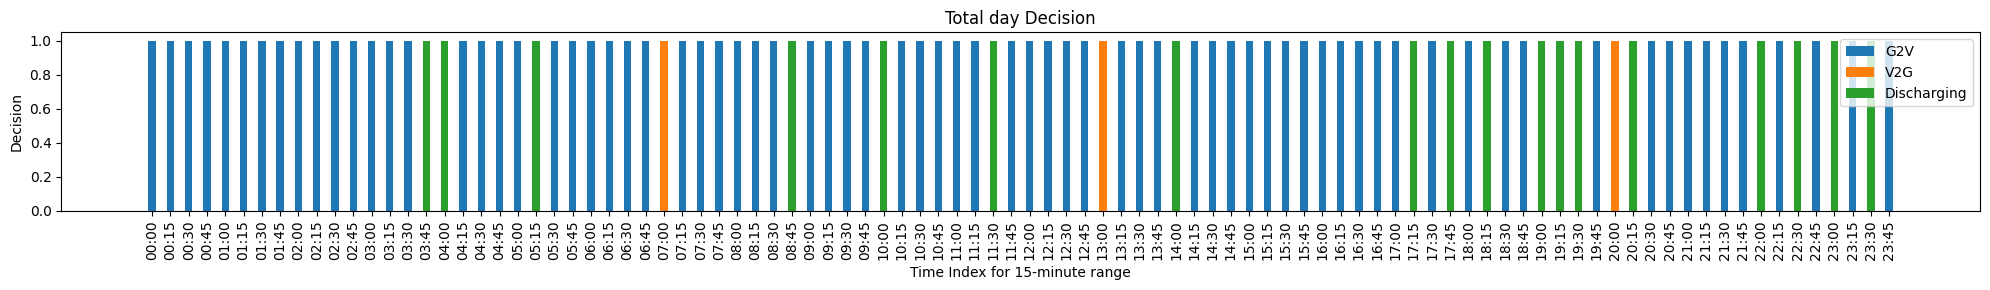

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (96 samples, 3 classes)
y_pred = np.array(values)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 3))
Time_index = [
    '00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45',
    '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45',
    '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45',
    '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45',
    '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45',
    '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45',
    '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45',
    '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30', '15:45',
    '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45',
    '18:00', '18:15', '18:30', '18:45', '19:00', '19:15', '19:30', '19:45',
    '20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45',
    '22:00', '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45'
]
# Set the x-axis ticks and labels
x_ticks = np.arange(len(y_pred))
x_labels = [time for time in Time_index]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)

# Plot the data as bars
bar_width = 0.4
class_labels = ['G2V', 'V2G', 'Discharging']
for i, class_values in enumerate(y_pred.T):
    ax.bar(x_ticks -0.2, class_values, bar_width, label=class_labels[i], align='edge')

plt.subplots_adjust(bottom=0.3, left=0)
# Add legend and axis labels
ax.legend()
ax.set_xlabel('Time Index for 15-minute range')
ax.set_ylabel('Decision')
ax.set_title('Total day Decision')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('my_plot.png')
